In [1]:
import numpy as np
import time 
import matplotlib.pyplot as plt
import cv2


## Question 1

### Part 1: DFT function

In [1]:
def dft1(array):
    N = len(array)
    n = np.arange(N)
    k = n.reshape((N, 1))
    mult = np.exp(-2j * np.pi * k * n / N)
    
    return np.dot(mult, array)


### Part 2: 2D DFT

In [3]:
def dft2(array):
    dft_rows = np.array([dft1(row) for row in array])
    dft = np.array([dft1(row) for row in dft_rows.T]).T

    return dft

##### Comparing results of dft1 and numpy's fft function

In [16]:
array = np.array([1, 2, 3, 4, 5])
dft = dft1(array)
print(dft)

[15. +0.j         -2.5+3.4409548j  -2.5+0.81229924j -2.5-0.81229924j
 -2.5-3.4409548j ]


In [17]:
dft_check = np.fft.fft(array)
print(dft_check)

[15. +0.j         -2.5+3.4409548j  -2.5+0.81229924j -2.5-0.81229924j
 -2.5-3.4409548j ]


#### Comparing results of dft2 and numpy's fft function

In [35]:
array = np.array([[1, 2, 3], 
                  [4, 5, 6],
                  [7, 8, 9]])

dft = dft2(array)
print(dft)

[[ 4.50000000e+01+0.00000000e+00j -4.50000000e+00+2.59807621e+00j
  -4.50000000e+00-2.59807621e+00j]
 [-1.35000000e+01+7.79422863e+00j  2.10942375e-15+1.77635684e-15j
   6.66133815e-16+5.55111512e-15j]
 [-1.35000000e+01-7.79422863e+00j  2.22044605e-16+2.88657986e-15j
  -4.99600361e-15+3.33066907e-15j]]


In [22]:
dft_check = np.fft.fft2(array)
print(dft_check)

[[ 45. +0.j          -4.5+2.59807621j  -4.5-2.59807621j]
 [-13.5+7.79422863j   0. +0.j           0. +0.j        ]
 [-13.5-7.79422863j   0. +0.j           0. +0.j        ]]


### Part 3: FFT function

In [2]:
def calculate_fft(array):
    length = len(array)

    if length == 1:
        return array
    else:
        even = calculate_fft(array[::2])
        odd = calculate_fft(array[1::2])

        # n = np.arange(length)
        mult = np.exp(-2j * np.pi * np.arange(length) / length)

        fft = np.zeros(length, dtype=complex)
        fft[:length // 2] = even + mult[:length // 2] * odd
        fft[length // 2:] = even + mult[length // 2:] * odd
        return fft
        


In [52]:
def fft1(array):
    length = len(array)
    
    closest = 2 ** int(np.ceil(np.log2(length)))
    array = np.pad(array, (0, closest - length), mode='constant', constant_values=0)

    return calculate_fft(array)

#### Comparing results of fft1 and numpy's fft function


In [6]:
array = np.array([1, 2, 3, 4, 5, 6, 7, 8])
fft = fft1(array)
print(np.array(fft))

[36.+0.00000000e+00j -4.+9.65685425e+00j -4.+4.00000000e+00j
 -4.+1.65685425e+00j -4.-2.44929360e-15j -4.-1.65685425e+00j
 -4.-4.00000000e+00j -4.-9.65685425e+00j]


In [9]:
array = np.array([1, 2, 3, 4, 5, 6, 7, 8])
fft_check = np.fft.fft(array)
print(fft_check)

[36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]


### Part 4: 2D FFT

In [56]:
def fft2(array):

    closest = 2 ** int(np.ceil(np.log2(max(array.shape))))
    array = np.pad(array, ((0, closest - array.shape[0]), (0, closest-array.shape[1])), mode='constant', constant_values=255)

    fft_rows = np.array([fft1(row) for row in array])
    fft = np.array([fft1(row) for row in fft_rows.T]).T

    return fft

#### Comparing results of fft2 and numpy's fft function


In [9]:
array = np.array([[1, 2, 3, 4], 
                  [5, 6, 7, 8],
                  [9, 10, 11, 12],
                  [13, 14, 15, 16]])

fft = fft2(array)
print(fft)

[[ 1.36000000e+02+0.00000000e+00j -8.00000000e+00+8.00000000e+00j
  -8.00000000e+00-8.81745695e-15j -8.00000000e+00-8.00000000e+00j]
 [-3.20000000e+01+3.20000000e+01j  2.88657986e-15-6.66133815e-16j
   2.20436424e-15+2.20436424e-15j  2.22044605e-16+2.44249065e-15j]
 [-3.20000000e+01-1.02870331e-14j  2.66453526e-15+1.33226763e-15j
   0.00000000e+00+2.44929360e-15j -1.33226763e-15+1.77635684e-15j]
 [-3.20000000e+01-3.20000000e+01j  6.66133815e-16+2.88657986e-15j
  -2.20436424e-15+2.20436424e-15j -2.44249065e-15+2.22044605e-16j]]


In [46]:
fft_check = np.fft.fft2(array)
print(fft_check)

[[136. +0.j  -8. +8.j  -8. +0.j  -8. -8.j]
 [-32.+32.j   0. +0.j   0. +0.j   0. +0.j]
 [-32. +0.j   0. +0.j   0. +0.j   0. +0.j]
 [-32.-32.j   0. +0.j   0. +0.j   0. +0.j]]


### Part 5: Run time comparison

In [12]:
ar128 = np.arange(128)
ar256 = np.arange(256)
ar512 = np.arange(512)
ar1024 = np.arange(1024)


In [49]:
time_dft = []

for ar in [ar128, ar256, ar512, ar1024]:
    start = time.time()
    dft1(ar)
    end = time.time()
    time_dft.append(end - start)

In [47]:
time_fft = []

for ar in [ar128, ar256, ar512, ar1024]:
    start = time.time()
    fft1(ar)
    end = time.time()
    time_fft.append(end - start)

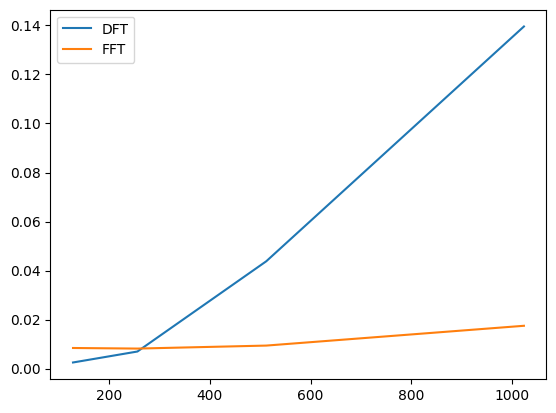

In [50]:
plt.plot([128, 256, 512, 1024], time_dft, label='DFT')
plt.plot([128, 256, 512, 1024], time_fft, label='FFT')
plt.legend()
plt.show()

From the above graph, we can see that the run time for the fft remains almost the same even when the size of the array increases, whereas in the case of dft, the run time increases exponentially with the increase in the size of the array.

### Part 6: 2D DFT on images

#### a\) I = 0.5 * (1+sin(x))

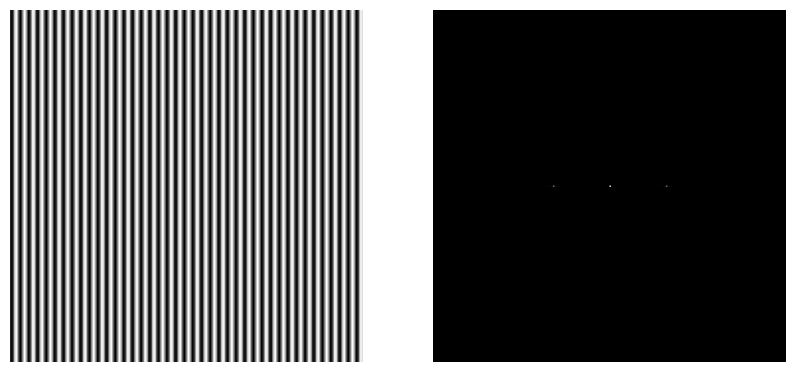

In [24]:
x = np.linspace(-128, 128, 256)

intensities = 0.5 * (1 + np.sin(x))

img1 = np.meshgrid(intensities, intensities)
img1 = img1[0]

img1_fft = fft2(img1)
img1_fft = np.fft.fftshift(img1_fft)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(img1_fft), cmap='gray')
plt.axis('off')

plt.show()

####  b) I = 0.5 *  ( 1 + sin(x) * sin(y) )

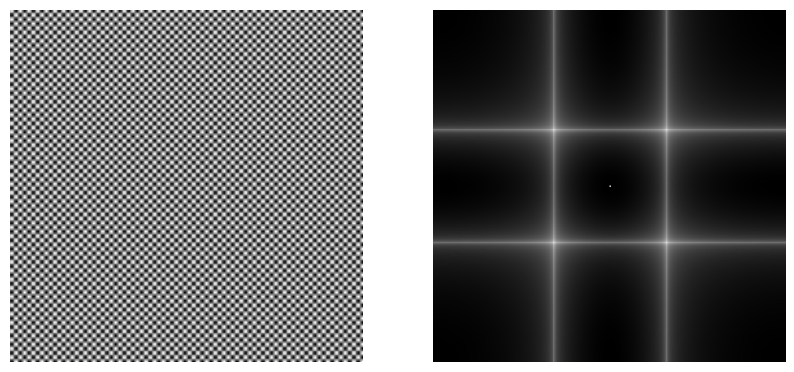

In [23]:
x = np.arange(-128, 128)
y = np.arange(-128, 128)

img2 = np.meshgrid(x, y)

img2 = 0.5 * (np.sin(img2[0]) * np.sin(img2[1]) + 1)

img2_fft = fft2(img2)
img2_fft = np.fft.fftshift(img2_fft)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(img2_fft)), cmap='gray')
plt.axis('off')

plt.show()

#### c) I = 0.5 * (  1 + sin( x^2 + y^2 ) )

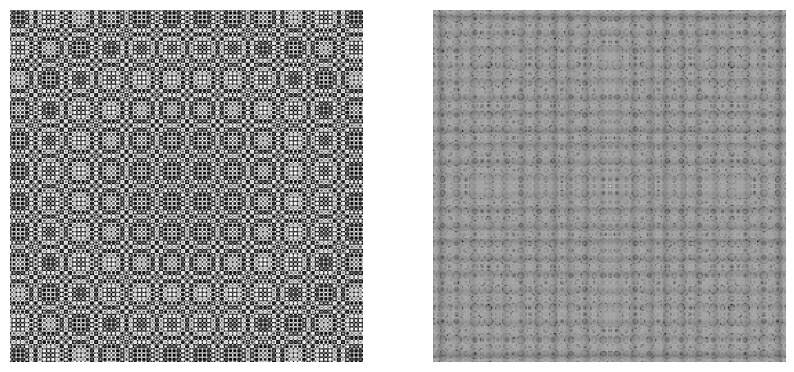

In [22]:
x = np.arange(-128, 128)
y = np.arange(-128, 128)

img3 = np.meshgrid(x, y)

img3 = 0.5 * (np.sin(img3[0]**2 + img3[1]**2) + 1)

img3_fft = fft2(img3)
img3_fft = np.fft.fftshift(img3_fft)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(img3_fft)), cmap='gray')
plt.axis('off')

plt.show()

### Part 7: DFT of img1

(-0.5, 2047.5, 2047.5, -0.5)

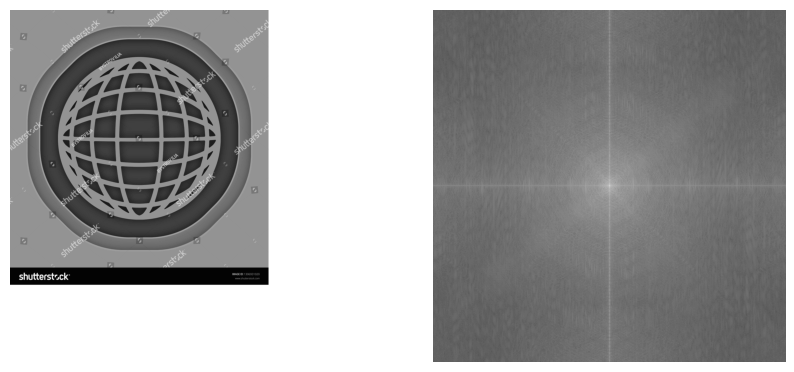

In [13]:
img = cv2.imread('1024_1024.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

closest = 2 ** int(np.ceil(np.log2(max(img.shape))))
img = np.pad(img, ((0, closest - img.shape[0]), (0, closest-img.shape[1])), mode='constant', constant_values=255)

img_fft = fft2(img)
img_fft = np.fft.fftshift(img_fft)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(img_fft)), cmap='gray')
plt.axis('off')

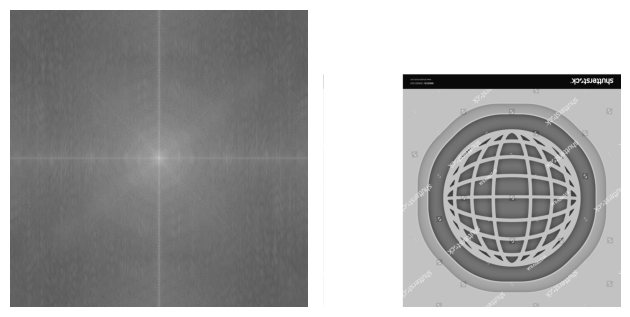

In [55]:
img = cv2.imread('1024_1024.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


img_fft = fft2(img)
img_fft_copy = img_fft.copy()
img_fft_copy = np.fft.fftshift(img_fft_copy)
# img_fft = np.fft.fftshift(img_fft)

img_fft_fft = fft2(img_fft)

plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(img_fft_copy)), cmap='gray')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(img_fft_fft)), cmap='gray')
plt.axis('off')

plt.tight_layout()

The FFT of the FFT of the image returns the original image but inverted

### Part 8: Inverse 2D DFT

In [59]:
def ifft1(array):
    length = len(array)

    if length == 1:
        return array
    else:
        even = ifft1(array[::2])
        odd = ifft1(array[1::2])

        # n = np.arange(length)
        mult = np.exp(2j * np.pi * np.arange(length) / length)

        ifft = np.zeros(length, dtype=complex)
        ifft[:length // 2] = even + mult[:length // 2] * odd
        ifft[length // 2:] = even + mult[length // 2:] * odd
        return ifft 

In [58]:
def ifft2(array):

    ifft_rows = np.array([ifft1(row) for row in array])
    ifft = np.array([ifft1(row) for row in ifft_rows.T]).T

    return ifft / (array.shape[0] * array.shape[1])

In [78]:
array = np.array([[1, 2, 3, 4],[5, 6, 7, 8]])
fft = fft2(array)

ifft = ifft2(fft)
print(ifft.real)

[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


(-0.5, 511.5, 511.5, -0.5)

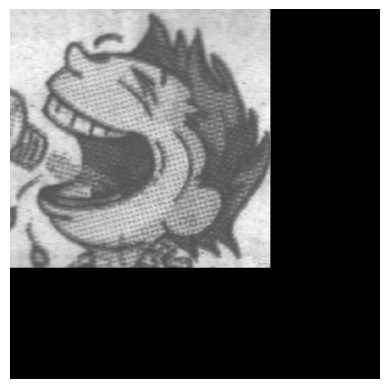

In [60]:
img = cv2.imread('cart.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h,w = img.shape

img_fft = fft2(img)

img_ifft = ifft2(img_fft)
img_ifft = img_ifft.real

plt.imshow(img_ifft, cmap='gray')
plt.axis('off')

#### Removing Padding

(-0.5, 360.5, 357.5, -0.5)

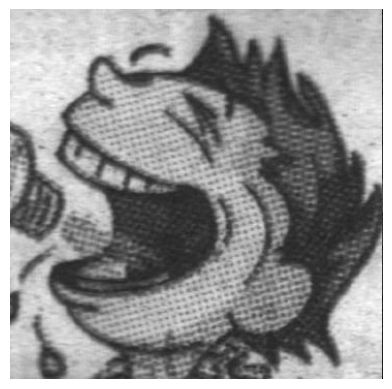

In [61]:
img_ifft = img_ifft[:h, :w]

plt.imshow(img_ifft, cmap='gray')
plt.axis('off')

## Question 2

### Part 1: Ideal Low Pass Filter

In [23]:
def idealLPF(img, cutoff):
    fft = fft2(img)
    fft = np.fft.fftshift(fft)

    rows, cols = fft.shape  
    H = np.zeros((rows, cols), dtype=complex)

    row = np.arange(rows)
    col = np.arange(cols)

    u, v = np.meshgrid(row, col)
    H[ np.where(np.sqrt((u - rows/2)**2 + (v - cols/2)**2) <= cutoff) ] = 1

    # for u in range(rows):
    #     for v in range(cols):
    #         D = np.sqrt((u-(rows/2))**2 + (v-(cols/2))**2)
    #         if D <= cutoff:
    #             H[u,v] = 1
    #         else:
    #             H[u,v] = 0

    shift = fft * H
    out = np.fft.ifftshift(shift)
    out = ifft2(shift)
    out = np.abs(out)

    return out.real, H.real

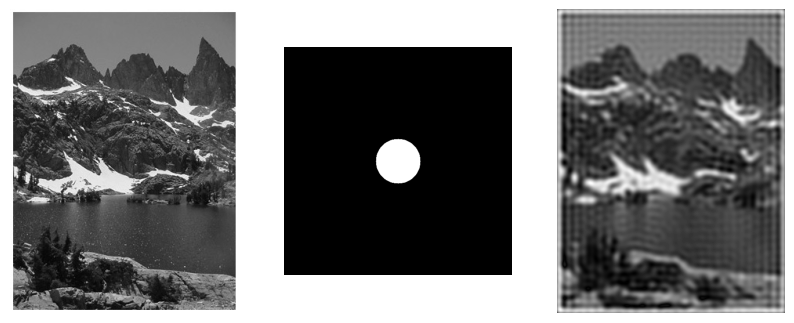

In [24]:
img = cv2.imread('lakeside.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

out, H = idealLPF(img, 50)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(H, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(out[:img.shape[0], :img.shape[1]], cmap='gray')
plt.axis('off')

plt.show()


### Part 2: Varying values of Do

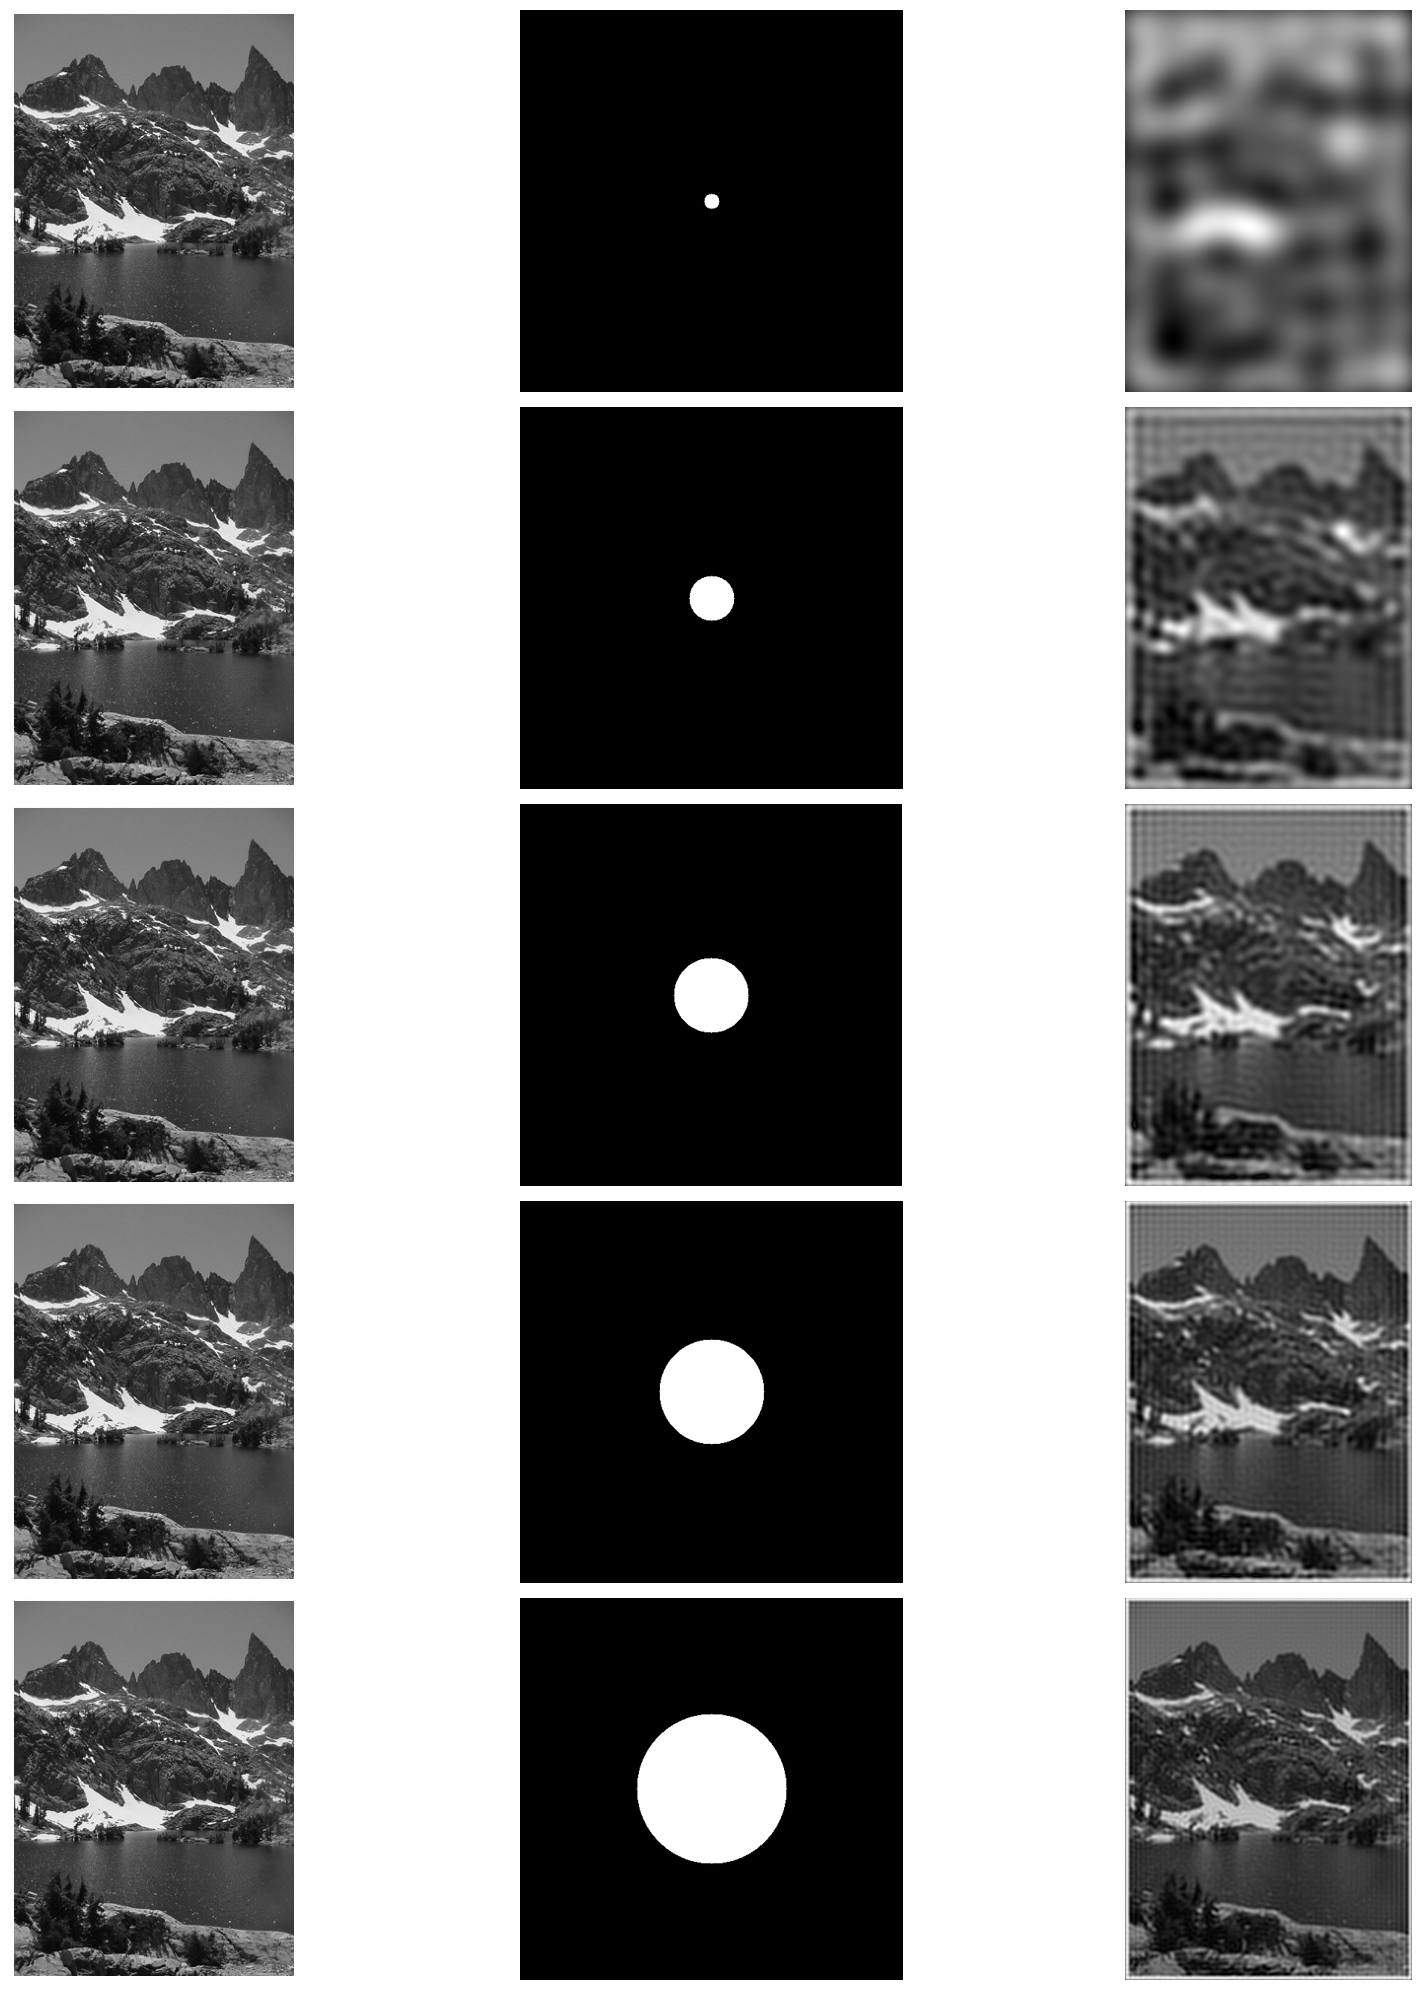

In [130]:
img = cv2.imread('lakeside.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Do = [10, 30, 50, 70, 100]
outputs = []
kernels = []

for d in Do:
    smooth, H = idealLPF(img, d)
    outputs.append(smooth[:img.shape[0], :img.shape[1]])
    kernels.append(H)

# smooth, H = idealLPF(img, 25)

plt.figure(figsize=(20, 20))
plt.subplot(5, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(5, 3, 2)
plt.imshow(kernels[0], cmap = 'gray')
plt.axis('off')

plt.subplot(5, 3, 3)
plt.imshow(outputs[0], cmap='gray')
plt.axis('off')

plt.tight_layout()

plt.subplot(5, 3, 4)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(5, 3, 5)
plt.imshow(kernels[1], cmap = 'gray')
plt.axis('off')

plt.subplot(5, 3, 6)
plt.imshow(outputs[1], cmap='gray')
plt.axis('off')

plt.tight_layout()

plt.subplot(5, 3, 7)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(5, 3, 8)
plt.imshow(kernels[2], cmap = 'gray')
plt.axis('off')

plt.subplot(5, 3, 9)
plt.imshow(outputs[2], cmap='gray')
plt.axis('off')

plt.tight_layout()

plt.subplot(5, 3, 10)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(5, 3, 11)
plt.imshow(kernels[3], cmap = 'gray')
plt.axis('off')

plt.subplot(5, 3, 12)
plt.imshow(outputs[3], cmap='gray')
plt.axis('off')

plt.tight_layout()

plt.subplot(5, 3, 13)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(5, 3, 14)
plt.imshow(kernels[4], cmap = 'gray')
plt.axis('off')

plt.subplot(5, 3, 15)
plt.imshow(outputs[4], cmap='gray')
plt.axis('off')

plt.tight_layout()




### Part 3: Guassian Low Pass Filter

In [63]:
def gaussianLPF(img, cutoff):
    fft = fft2(img)
    fft = np.fft.fftshift(fft)

    rows, cols = fft.shape  
    H = np.zeros((rows, cols), dtype=complex)

    row = np.arange(rows)
    col = np.arange(cols)

    u, v = np.meshgrid(row, col)

    D = ((u-(rows/2))**2 + (v-(cols/2))**2)
    H = np.exp(-D/(2*(cutoff**2)))

    # for u in range(rows):
    #     for v in range(cols):
    #         D = ((u-(rows/2))**2 + (v-(cols/2))**2)
    #         H[u,v] = np.exp(-D/(2*(cutoff**2)))

    shift = fft * H
    out = np.fft.ifftshift(shift)
    out = ifft2(shift)
    out = np.abs(out)

    return out.real, H.real

(-0.5, 290.5, 387.5, -0.5)

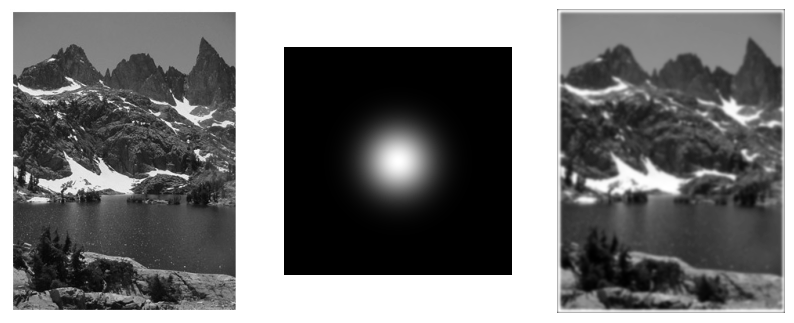

In [26]:
img = cv2.imread('lakeside.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

out, H = gaussianLPF(img, 50)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(H, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(out[:img.shape[0], :img.shape[1]], cmap='gray')
plt.axis('off')

### Part 4: Comparing Gaussian Low Pass Filter and Gaussian Smoothening Filter

In [10]:
def conv2D(img, kernel):
    pad = kernel.shape[0] // 2
    
    pad_img = np.pad(img, pad_width=pad, mode='constant', constant_values=0)
    output = np.zeros(shape=(img.shape[0], img.shape[1]))

    for i in range(pad, img.shape[0] + pad):
        for j in range(pad, img.shape[1] + pad):
            output[i - pad, j - pad] = np.sum(pad_img[i-pad:i+pad+1, j-pad:j+pad+1] * kernel)
    
    return output 


def GaussianFilter(img, k, sigma):
    kernel = np.ones(shape=(k, k))

    for i in range(k):
        for j in range(k):
            x, y = i - k // 2, j - k // 2
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))

    kernel = kernel / np.sum(kernel)

    out = conv2D(img, kernel)
    
    return out.astype(np.uint8)

(-0.5, 290.5, 387.5, -0.5)

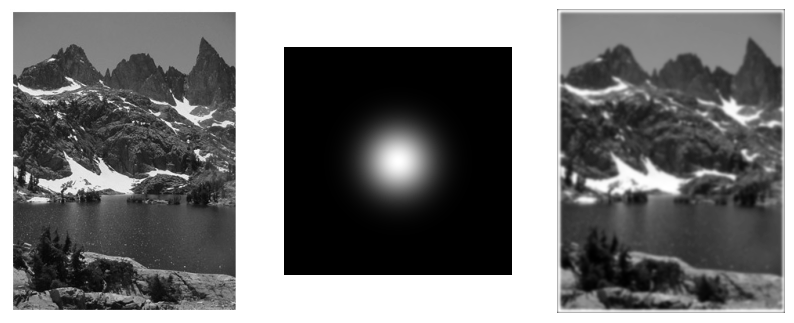

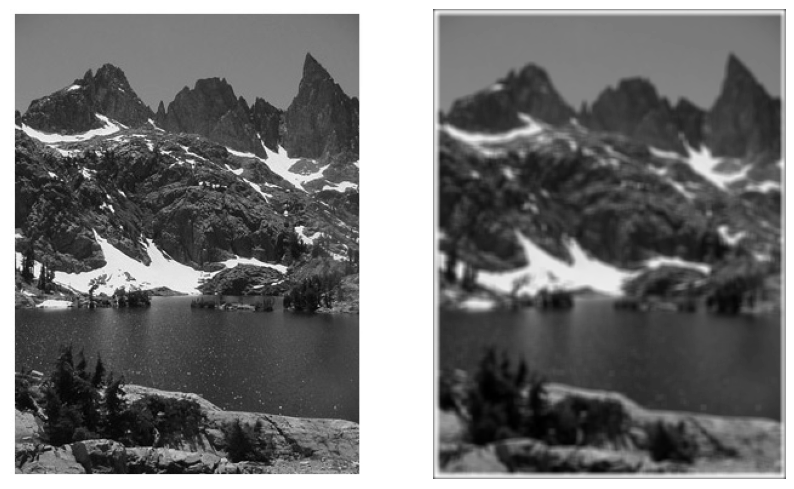

In [139]:
img = cv2.imread('lakeside.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

out, H = gaussianLPF(img, 50)
smooth_out = GaussianFilter(img, 5, 10)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(H, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(out[:img.shape[0], :img.shape[1]], cmap='gray')
plt.axis('off')

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smooth_out, cmap='gray')
plt.axis('off')

(-0.5, 290.5, 387.5, -0.5)

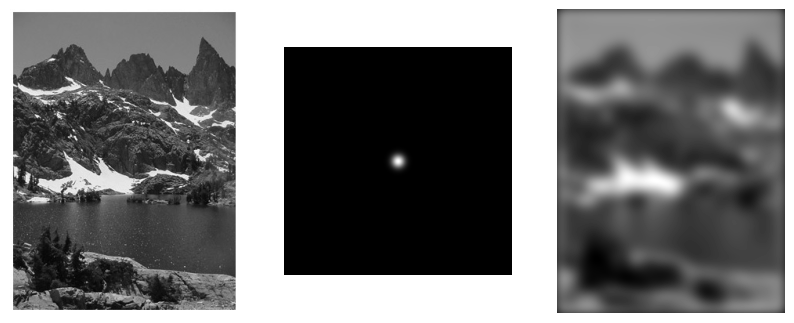

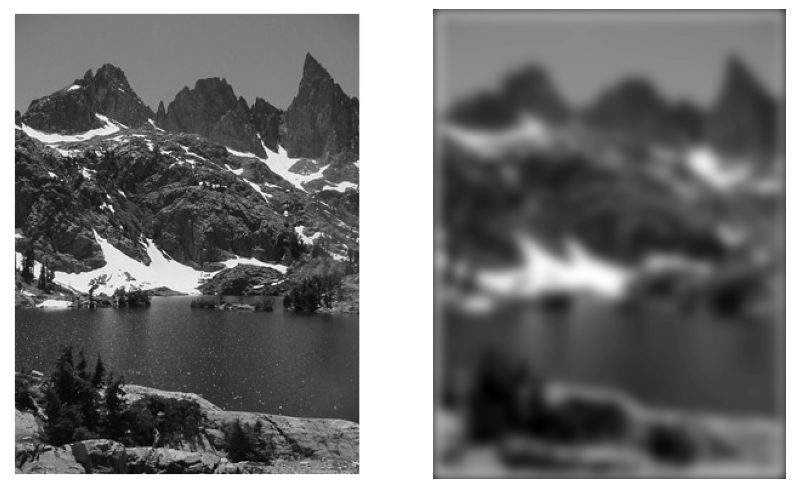

In [15]:
img = cv2.imread('lakeside.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

out, H = gaussianLPF(img, 10)
smooth_out = GaussianFilter(img, 51, 5)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(H, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(out[:img.shape[0], :img.shape[1]], cmap='gray')
plt.axis('off')

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smooth_out, cmap='gray')
plt.axis('off')

From the above images we can make the following observations:
* For different values of the cutoff frequency, we can observe different levels of blurring in the image. The higher the cutoff frequency, the lesser the blurring.
* A similar effect is observed using the Gaussian Smoothening Filter. The higher the value of sigma, the greater the blurring.
* Images of equivalent blurring are obtained for Gaussian Smoothening filer and the Gaussian Low Pass Filter for different values of sigma and Do respectively.
* The Gaussian Smoothening Filter is applied in the spacial domain while the Gaussian low pass filter is applied in the frequency domain.


## Question 3

The images given is covered with dots which represent high frequency regions. Thus to remove these dots we can use Low Pass Filters which remove high frequency regions from the image. In the below code, Gaussian Low Pass Filter is used with the cutoff frequency 35 to generate the cleaned image.

(-0.5, 360.5, 357.5, -0.5)

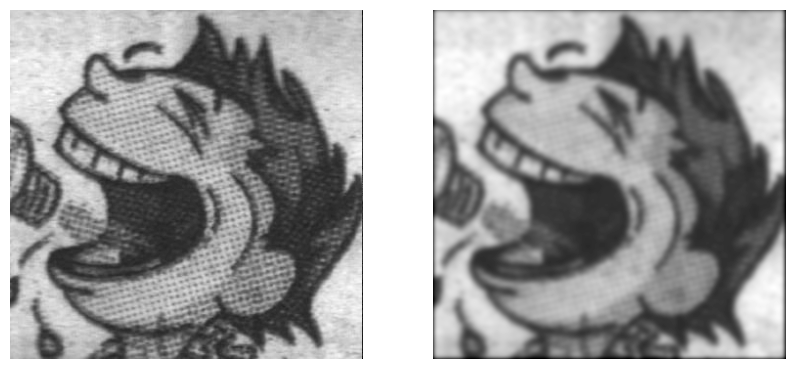

In [22]:
img = cv2.imread('cart.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

out, H = gaussianLPF(img, 35)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(out[:img.shape[0], :img.shape[1]], cmap='gray')
plt.axis('off')
